In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

bogger_cycle = pd.read_csv("../Orb/BoggerCycle_LD118.csv")
equipment_task = pd.read_csv("../Orb/EquipmentTask_LD118.csv")

In [4]:
from time import strftime, gmtime, strptime
#from datetime import utcfromtimestamp
#strftime("%B %d %Y", "1284101485")
#strftime("%a, %d %b %Y %H:%M:%S +0000", datetime.utcnow())#utcfromtimestamp(1284101485))

In [5]:
bogger_cycle.head(3)

,Unnamed: 0,EquipmentName,TippleName,DrawPoint,StartDateTime,EndDateTime,Tonnage,StartLoadedDateTime,AuGrade,EmptyMetres,LoadedMetres,Operator,OrderID,DataSource,TonnesType,_CreatedInOrbBy,_CreatedInOrbAt,_LastUpdatedInOrbBy,_LastUpdatedInOrbAt,_UpdatedInOneViewAt
0,1,LD118,DP103,112E05,2016-11-11 01:22:40,2016-11-11 01:25:48,16.95,2016-11-11 01:22:40,NaN,NaN,NaN,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,NaN,MPM,Ordered,Orb,2016-11-11 01:26:01,Orb,2016-11-11 01:26:09,2016-11-11 01:26:40
1,2,LD118,DP103,112E05,2016-11-11 01:25:48,2016-11-11 01:28:29,16.30,2016-11-11 01:27:40,NaN,NaN,NaN,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,NaN,MPM,Ordered,Orb,2016-11-11 01:29:01,Orb,2016-11-11 01:29:03,2016-11-11 01:29:40
2,3,LD118,DP103,112E05,2016-11-11 01:28:29,2016-11-11 01:35:55,14.00,2016-11-11 01:34:46,NaN,NaN,NaN,8697ed3c178553472fcdd09939e91bd61190211e6bb8ee...,NaN,MPM,Ordered,Orb,2016-11-11 01:36:07,Orb,2016-11-11 01:36:10,2016-11-11 01:36:40


In [5]:
bogger_cycle.columns

Index(['Unnamed: 0', 'EquipmentName', 'TippleName', 'DrawPoint',
       'StartDateTime', 'EndDateTime', 'Tonnage', 'StartLoadedDateTime',
       'AuGrade', 'EmptyMetres', 'LoadedMetres', 'Operator', 'OrderID',
       'DataSource', 'TonnesType', '_CreatedInOrbBy', '_CreatedInOrbAt',
       '_LastUpdatedInOrbBy', '_LastUpdatedInOrbAt', '_UpdatedInOneViewAt'],
      dtype='object')

In [6]:
list(zip(bogger_cycle.columns, [type(x) for x in bogger_cycle.ix[0,:]]))

[('Unnamed: 0', numpy.int64),
 ('EquipmentName', str),
 ('TippleName', str),
 ('DrawPoint', str),
 ('StartDateTime', str),
 ('EndDateTime', str),
 ('Tonnage', numpy.float64),
 ('StartLoadedDateTime', str),
 ('AuGrade', numpy.float64),
 ('EmptyMetres', numpy.float64),
 ('LoadedMetres', numpy.float64),
 ('Operator', str),
 ('OrderID', numpy.float64),
 ('DataSource', str),
 ('TonnesType', str),
 ('_CreatedInOrbBy', str),
 ('_CreatedInOrbAt', str),
 ('_LastUpdatedInOrbBy', str),
 ('_LastUpdatedInOrbAt', str),
 ('_UpdatedInOneViewAt', str)]

In [16]:
len(bogger_cycle['Operator'].unique())

62

In [17]:
bogger_cycle['TippleName'].unique()

array(['DP103', 'DP102', '_SP108W', '_SP108E', 'DP101', 'DP104', '_SP112E',
       '_SP110E', '_SP114E', nan, '_SP112W', '_SP114W', '_SP116E'], dtype=object)

In [18]:
bogger_cycle['DrawPoint'].unique()

array(['112E05', '112E12', '112E02', '112W02', '108W04', '108W06',
       '108W07', '108W03', '108E02', '108W12', '108W13', '108E03',
       '108E09', '108E04', '108E05', '108E13', '108E08', '108E07',
       '108E12', '108W11', '108W10', '108W02', '108W08', '108E11',
       '108E10', '108E06', '108W05', '114E05', '114W07', '114W05',
       '116W05', '112E04', '110E06', '112W05', '112W07', '112W03',
       '112W04', '112W09', '112W11', '112W10', '112W12', '112W13',
       '112E10', '112E07', '112E08', '112E03', '112E09', '112W08',
       '112E13', '118E06', '118E03', '118E07', '118E10', '112W06',
       '112E06', '114E02', '116E04', '116W02', '116W03', '112E11',
       '114E08', '114W03', '114W02', '116E05', '114W10', '116W08',
       '114W13', '114W11', '114E09', '114E03', '118E11', '116W04',
       '118E09', '114W09', '116W09', '116W10', '114W12', '114E11',
       '114E10', '114E04', '114E07', '116W07', '114E12', '114E06',
       '114W08', '110W09', '110E12', '110E13', '110W13', '110E

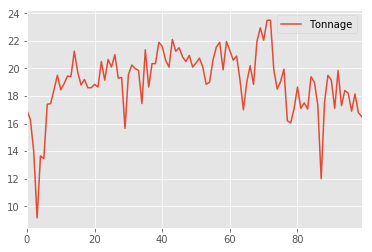

In [52]:
%matplotlib inline
# ts = pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10))
# ts = ts.cumsum()
# ts
# plt.figure(); 
# ts.plot()
bogger_cycle[['EndDateTime', 'Tonnage']][0:100].plot()


In [5]:
equipment_task.head(3)

,Unnamed: 0,StartDateTime,EndDateTime,EquipmentName,ActivityName,SubActivityName,ActivityCategoryName,LocationName,PanelCave,Operator,...,OrderStartDateTime,OrderLocationName,DataSource,_CreatedInOrbBy,_CreatedInOrbAt,_LastUpdatedInOrbBy,_LastUpdatedInOrbAt,_UpdatedInOneViewAt,ActivityGroup,CumulativeEngineHours
0,1,2016-11-01 06:59:59,2016-11-01 18:59:59,LD118,Unknown,NaN,Unknown,Offsite,Cadia,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,...,NaN,NaN,PITRAM,Orb,2016-11-01 07:04:10,Orb,2016-11-01 19:01:43,2016-11-01 19:02:00,NaN,NaN
1,2,2016-11-01 18:59:59,2016-11-02 06:59:59,LD118,Unknown,NaN,Unknown,Offsite,Cadia,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,...,NaN,NaN,PITRAM,Orb,2016-11-01 19:01:42,Orb,2016-11-02 07:01:39,2016-11-02 07:02:41,NaN,NaN
2,3,2016-11-02 06:59:59,2016-11-02 18:59:59,LD118,Unknown,NaN,Unknown,Offsite,Cadia,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,...,NaN,NaN,PITRAM,Orb,2016-11-02 07:01:38,Orb,2016-11-02 19:01:31,2016-11-02 19:01:49,NaN,NaN


In [6]:
equipment_task.columns

Index(['Unnamed: 0', 'StartDateTime', 'EndDateTime', 'EquipmentName',
       'ActivityName', 'SubActivityName', 'ActivityCategoryName',
       'LocationName', 'PanelCave', 'Operator', 'OperatorLoginDateTime',
       'OrderStartDateTime', 'OrderLocationName', 'DataSource',
       '_CreatedInOrbBy', '_CreatedInOrbAt', '_LastUpdatedInOrbBy',
       '_LastUpdatedInOrbAt', '_UpdatedInOneViewAt', 'ActivityGroup',
       'CumulativeEngineHours'],
      dtype='object')

In [7]:
list(zip(equipment_task.columns, [type(x) for x in equipment_task.ix[0,:]]))

[('Unnamed: 0', numpy.int64),
 ('StartDateTime', str),
 ('EndDateTime', str),
 ('EquipmentName', str),
 ('ActivityName', str),
 ('SubActivityName', float),
 ('ActivityCategoryName', str),
 ('LocationName', str),
 ('PanelCave', str),
 ('Operator', str),
 ('OperatorLoginDateTime', numpy.float64),
 ('OrderStartDateTime', numpy.float64),
 ('OrderLocationName', float),
 ('DataSource', str),
 ('_CreatedInOrbBy', str),
 ('_CreatedInOrbAt', str),
 ('_LastUpdatedInOrbBy', str),
 ('_LastUpdatedInOrbAt', str),
 ('_UpdatedInOneViewAt', str),
 ('ActivityGroup', float),
 ('CumulativeEngineHours', numpy.float64)]

In [22]:
equipment_task['ActivityName'].unique()

array(['Unknown', 'Tramming for service', 'Electrical',
       'Tramming for repair', 'Bogging', 'Wait Red Light', 'Wait Fitter',
       'Wait Other Equipment', 'PM Tyres', 'Bunding',
       'Tramming between jobs', 'Service Refuel Equipment', 'Tyres',
       'Power Train', 'Released by workshop', 'Idle (Not Required)',
       'Bogging - Roadworks', 'PM Daily', 'Wait Southern Perimeter',
       'Prepping', 'Engine', 'Serv Failure - Vent', 'Hydraulics',
       'Clean Up', 'No Operator', 'Bucket - GET', 'PM Service Overrun',
       'Damage', 'PM Service', 'Wait Parts', 'Structural',
       'Air Conditioning', 'Incident/Emergency',
       'Serv Failure - Mine Water', 'Equipment not required',
       'Preventative Maintenance', 'Wait Shift Boss',
       'Wait - Independent Firing', 'Dust',
       'Serv Failure - Communications', 'Wait - Firing/Re-Entries',
       'Low Power', 'Frozen Scene', 'Over Heating', 'Samplers',
       'Wait - Technology', 'Swap Operator ', 'Steering',
       'Boggi

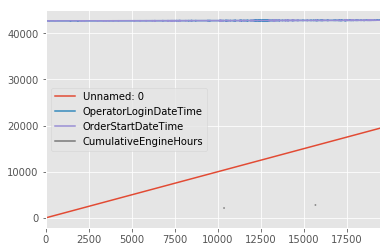

In [53]:
equipment_task.plot()